# Assignment 4 - s214643
01/12 - 22

## 1) Multiple choice
### A) LU factorization
Answer: 1. Large rounding errors
### B) Condition number
Answer: 4. Sensitivity of solution to error
### C) Linear system
Answer: 3. 7500
### d) Gaussian elimination
Answer: 3. Change: 1 and 3, 2 and 3

## 2) Newtons method for systems of nonlinear equations

1. Implement FdFhj4:

In [11]:
import numpy as np

def FdFhj4(x):
    F = lambda x: np.array([
        2 * x[0] + x[1] + 2 * np.cos(x[0]),
        x[0] + 2* x[1] - np.sin(x[1])
    ], dtype=float)
    
    hessian = lambda x: np.array([
        [2 - 2 * np.sin(x[0]), 1],
        [1, 2 - np.cos(x[1])]
    ], dtype=float)
    
    return F(x), hessian(x)

def newt_sys(FdFhj4, x0, itter):
    x = x0.copy()
    estimate = [x.copy()]
    
    for _ in range(itter):
        f, df = FdFhj4(x)
        h = np.linalg.solve(df, -f).flatten()
        x += h
        estimate.append(x.copy())
    return estimate

2. Run newton systems and find convergence

In [12]:
x_hat = newt_sys(FdFhj4, np.array([-1, 10], dtype=float), 6)
x_hat

[array([-1., 10.]),
 array([-1.65951517,  3.34835148]),
 array([-1.13772814,  1.41319155]),
 array([-1.01449234,  0.96595132]),
 array([-0.99009877,  0.88266467]),
 array([-0.98929344,  0.88002569]),
 array([-0.98929265,  0.88002314])]

The function converges on the vector: $\textbf{x} = [-0.98, 0.88]$

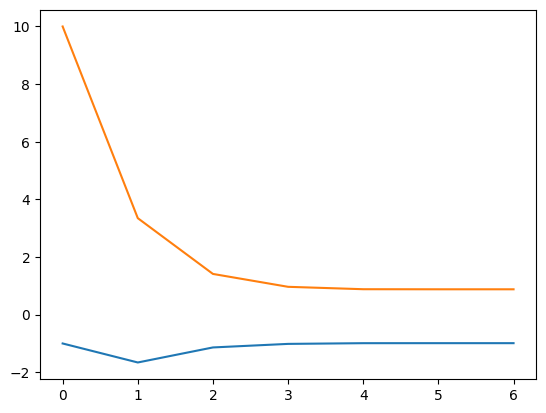

In [9]:
import matplotlib.pyplot as plt
plt.plot(x_hat)
plt.show()

3. Convergence

In [21]:
stat_point = np.array([-0.989292652343593, 0.880023136121182])

err = np.max(abs(x_hat - stat_point), axis=1)
rel_err = err[1:] / err[:-1]**2
rel_err

array([0.02967669, 0.08751017, 0.3022782 , 0.35775477, 0.36597223,
       0.36658225])

Approximation: $C \approx 0.36$

## 3) Sensitivity analysis

1. Prove that \
We first define $b_m = 0.001$ as the maximum error in the vector. \
Then we find the norm of this vector.
\begin{align*}
    b_m &= max||\delta b||_2 \\
    \left|\left| 
    \begin{bmatrix}
        b_{m} \\
        b_{m} \\
        \vdots \\
        b_{m}
    \end{bmatrix}
    \right|\right| 
    & = \sqrt{n\cdot b_{m}^2} = \sqrt{n} \cdot b_m
\end{align*}

2. Compute relative error

\begin{equation}
\frac{||\delta x||_2}{||x||_2} = \frac{||\tilde{x} - x||_2}{||x||} \leq \kappa(A)^2 \frac{||\delta b||_2}{||b||_2} = 3.8^2 \frac{\sqrt{100}\cdot 0.001}{1.7} \approx 0.085
\end{equation}

So the upper bound for relative error is calculated as the above
